In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
plt.style.use('ggplot')

### Import Emissions Data

In [20]:
# Import Emissions Data
emissions_df = pd.read_csv('Data_Files/fossil-fuel-co2-emissions-by-nation_csv.csv')
emissions_df.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


In [21]:
# Drop unnecessary columns and rename remaining columns
emissions_df.drop(labels = ['Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring',
                            'Per Capita', 'Bunker fuels (Not in Total)'], axis = 1, inplace = True)
emissions_df.columns = ['Year', 'Country', 'Fossil_Fuel_CO2_Emissions']
emissions_df.head()

,Year,Country,Fossil_Fuel_CO2_Emissions
0,1751,UNITED KINGDOM,2552
1,1752,UNITED KINGDOM,2553
2,1753,UNITED KINGDOM,2553
3,1754,UNITED KINGDOM,2554
4,1755,UNITED KINGDOM,2555


In [22]:
def select_countries(country):
    selected_countries = ['UNITED STATES OF AMERICA', 'SPAIN', 'AUSTRALIA', 'SOUTH AFRICA', 'CHINA (MAINLAND)', 'BRAZIL'] 
    if (country in selected_countries): 
        return True
    else: 
        return False

In [23]:
# Select countries and create dictionary of country/dataframe
chosen_countries = filter(select_countries, list(emissions_df.Country.unique()))

country_df_names = []
for country in chosen_countries:
    df_name = f"{country}_df"
    country_df_names.append(df_name)

country_df_dict = {}
for df in country_df_names:
    country_df_dict[df] = emissions_df[emissions_df.Country == df[:-3]]

In [24]:
# Convert each country dataframe into proper time series layout
for key in country_df_dict.keys():
    country_df_dict[key].Year = pd.to_datetime(country_df_dict[key].Year, format = '%Y')
    country_df_dict[key].drop('Country', axis = 1, inplace = True)
    country_df_dict[key].set_index('Year', inplace = True)

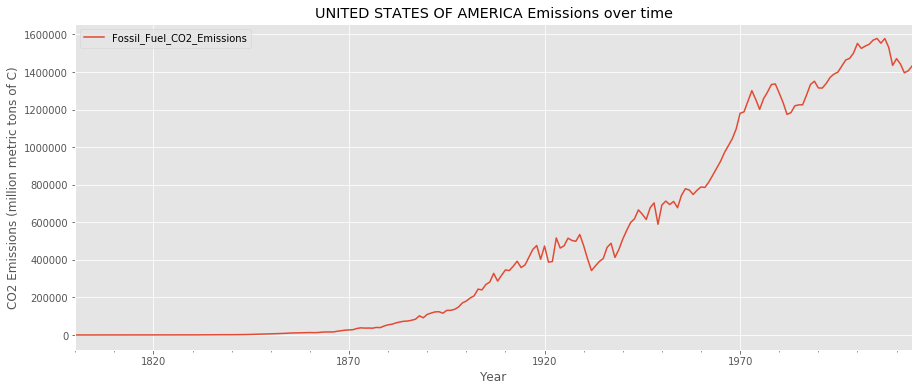

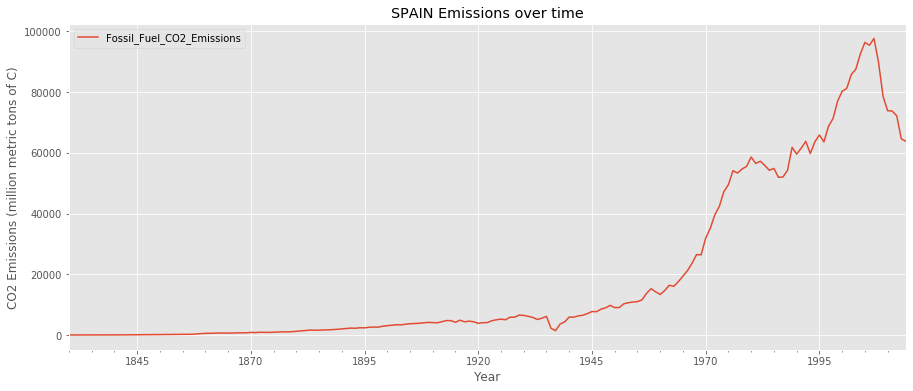

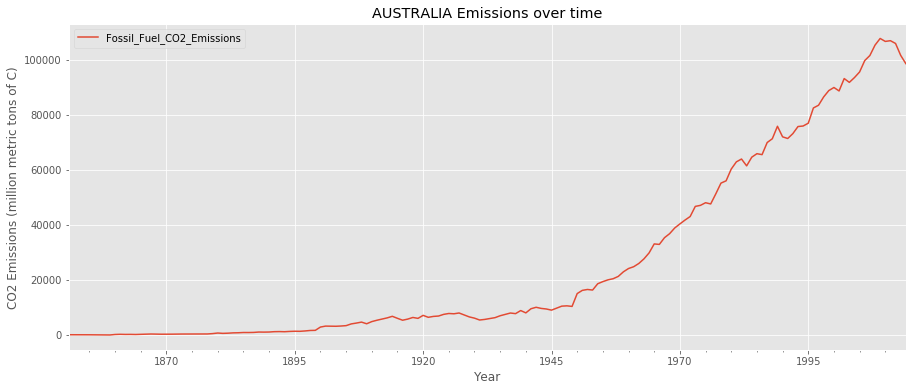

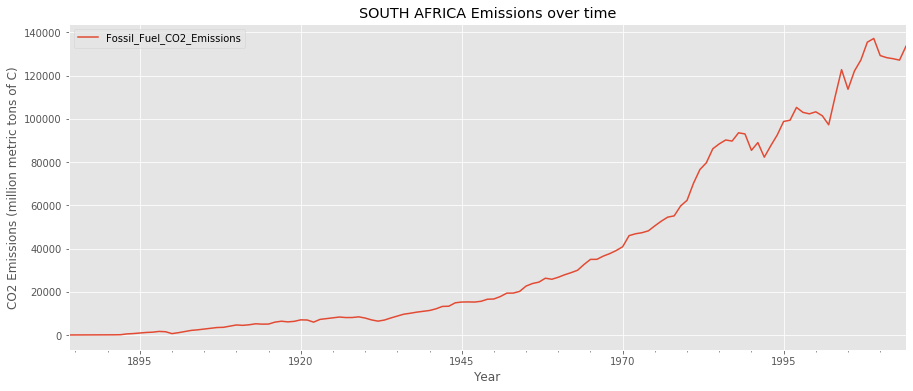

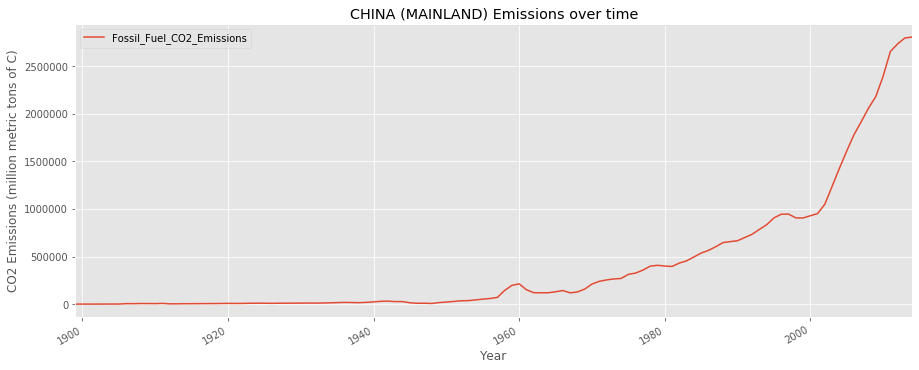

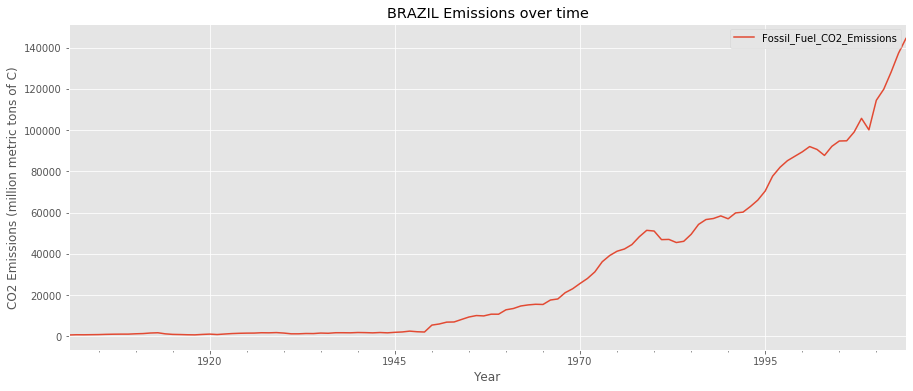

In [25]:
# Visualize Time Series by Country
for key in country_df_dict.keys(): 
    country_df_dict[key].plot(figsize=(15,6))
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (million metric tons of C)')
    plt.title(f'{key[:-3]} Emissions over time')
    plt.show()

In [30]:
# Drop years prior to 1902 (China has gaps prior to this year)
for key in country_df_dict.keys():
    country_df_dict[key] = country_df_dict[key].loc[(country_df_dict[key].index >= pd.to_datetime(1902, format = '%Y'))]

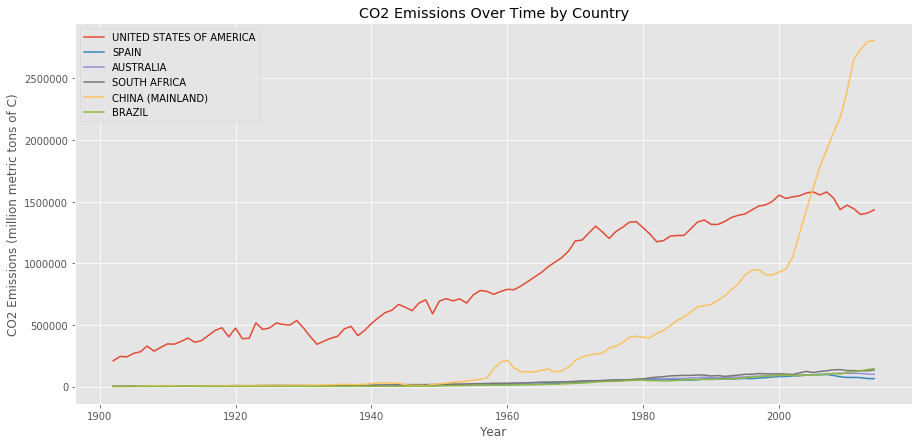

In [38]:
# Visualize All Time Series Together
fig, ax = plt.subplots(figsize = (15,7))

for key in country_df_dict.keys(): 
    ax.plot(country_df_dict[key], label = key[:-3])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (million metric tons of C)')
plt.title('CO2 Emissions Over Time by Country')
plt.legend(loc = 'best')
plt.show()

In [41]:
# Perform 1st order differencing on each time series
diff_country_df_dict = {}
for key in country_df_dict.keys():
    diff_country_df_dict[key] = country_df_dict[key].diff(periods = 1).dropna()

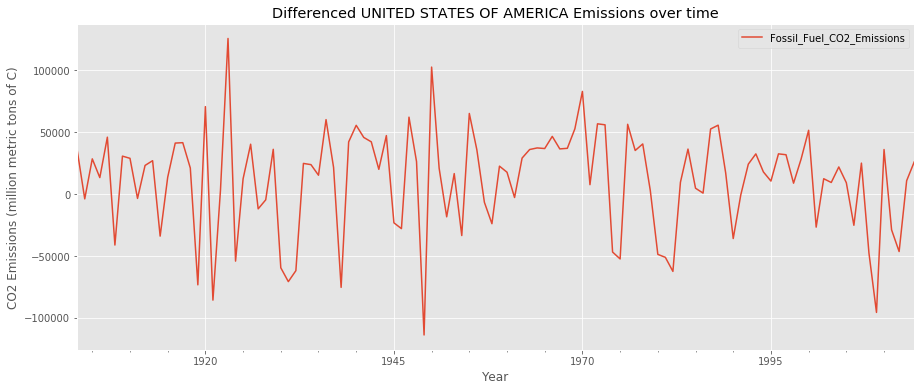

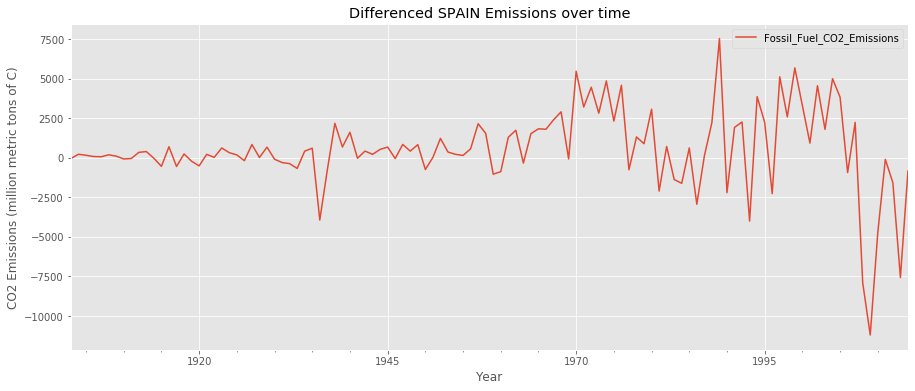

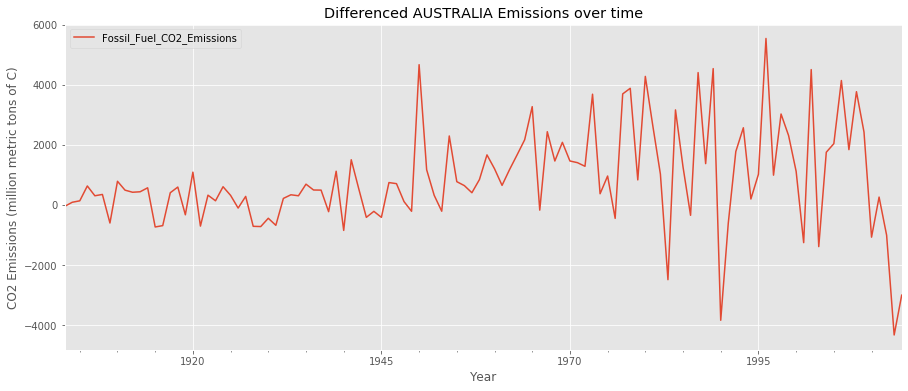

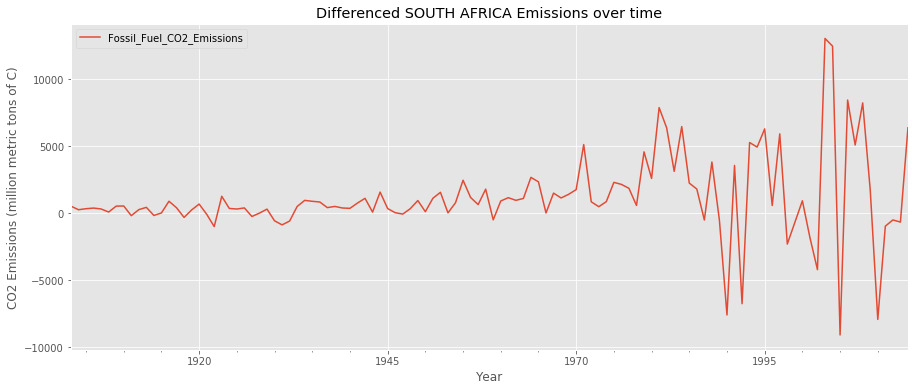

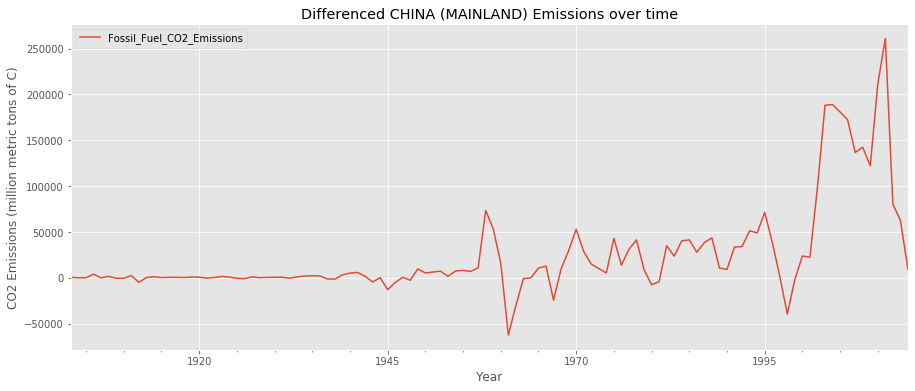

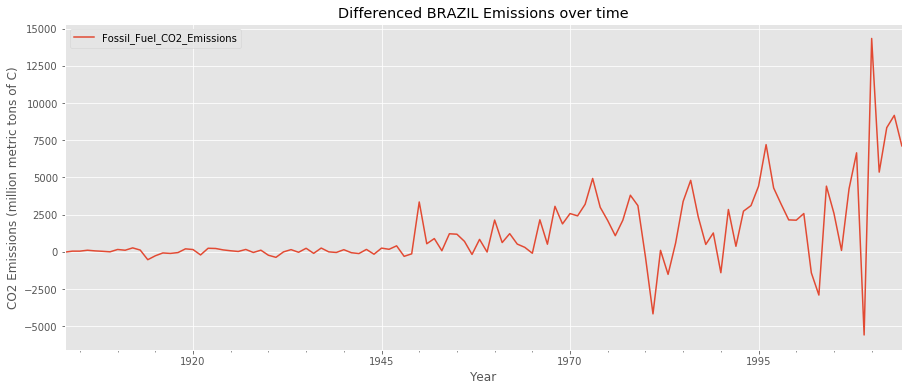

In [43]:
# Visualize Differenced Time Series by Country
for key in diff_country_df_dict.keys(): 
    diff_country_df_dict[key].plot(figsize=(15,6))
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (million metric tons of C)')
    plt.title(f'Differenced {key[:-3]} Emissions over time')
    plt.show()

In [44]:
# Dickey-Fuller Tests on 1st Order Differenced TSs
dftest_pvalue_dict = {}
for key in diff_country_df_dict.keys():
    dftest = adfuller(diff_country_df_dict[key].Fossil_Fuel_CO2_Emissions)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Stat', 'p-value', '# lags used', '# Observations used'])
    dftest_pvalue_dict[key] = dftest[1]
dftest_pvalue_dict
print((np.array(list(dftest_pvalue_dict.values())) < .05).sum())
dftest_pvalue_dict

4


{'UNITED STATES OF AMERICA_df': 1.2665484553288515e-05,
 'SPAIN_df': 0.01135832901522947,
 'AUSTRALIA_df': 0.4647913523000541,
 'SOUTH AFRICA_df': 1.818594942518012e-17,
 'CHINA (MAINLAND)_df': 0.027794195298366096,
 'BRAZIL_df': 0.6368545482018173}

In [45]:
# Perform 2nd order differencing on each time series
diff2_country_df_dict = {}
for key in diff_country_df_dict.keys():
    diff2_country_df_dict[key] = diff_country_df_dict[key].diff(periods = 1).dropna()

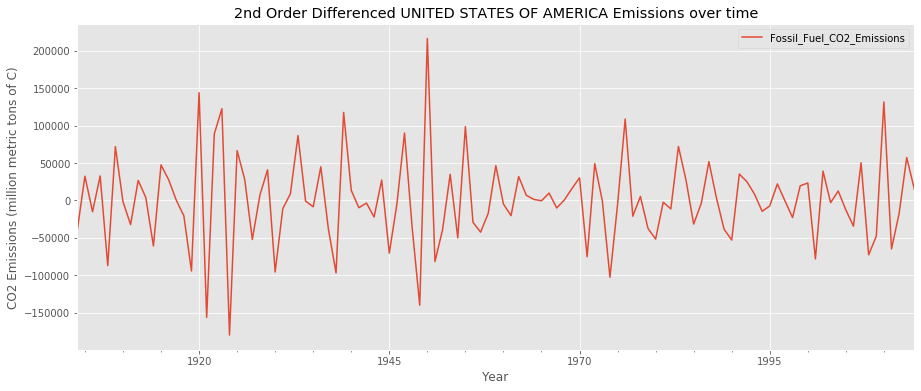

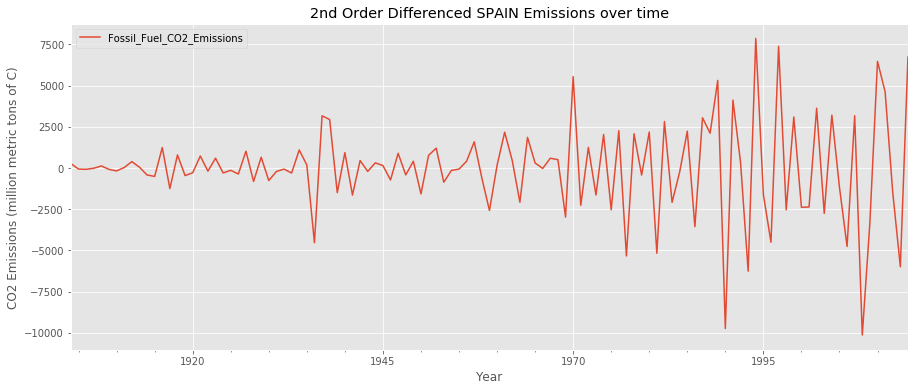

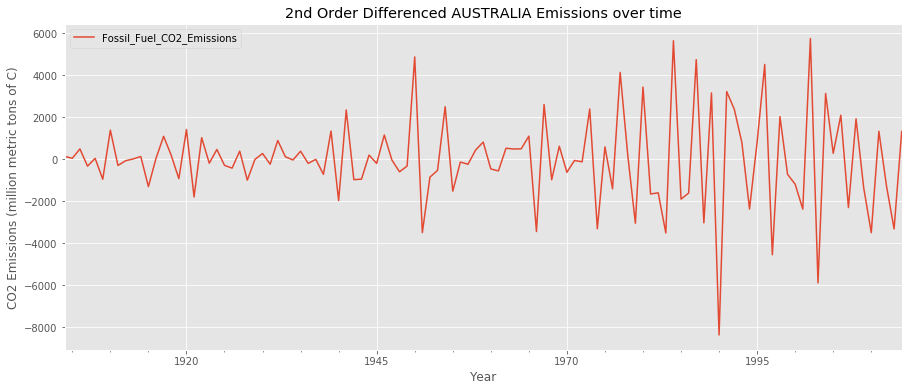

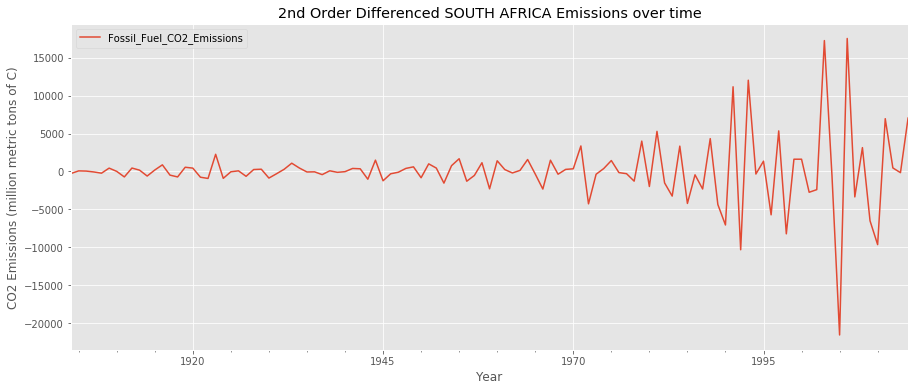

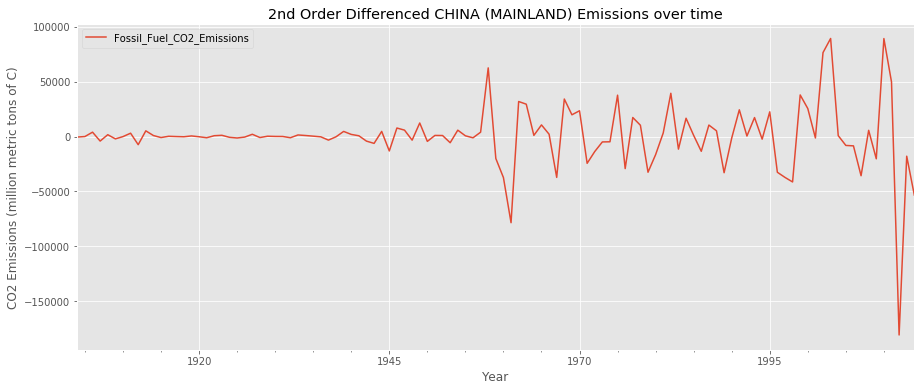

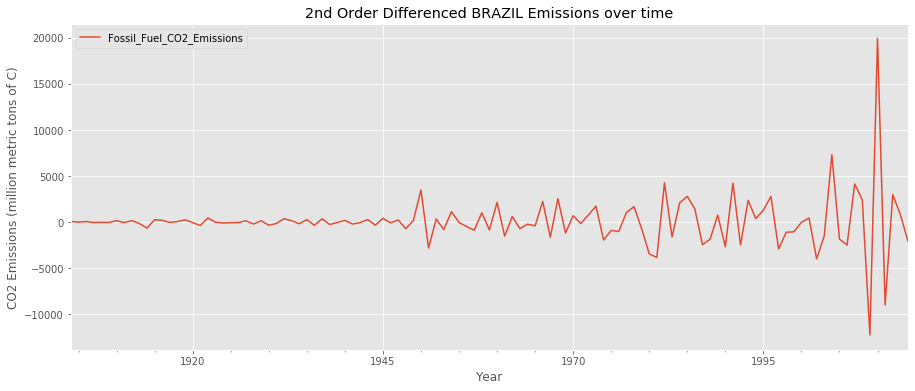

In [46]:
# Visualize 2nd Order Differenced Time Series by Country
for key in diff2_country_df_dict.keys(): 
    diff2_country_df_dict[key].plot(figsize=(15,6))
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (million metric tons of C)')
    plt.title(f'2nd Order Differenced {key[:-3]} Emissions over time')
    plt.show()

In [47]:
# Dickey-Fuller Tests on 2nd Order Differenced TSs
dftest_pvalue_dict = {}
for key in diff2_country_df_dict.keys():
    dftest = adfuller(diff2_country_df_dict[key].Fossil_Fuel_CO2_Emissions)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Stat', 'p-value', '# lags used', '# Observations used'])
    dftest_pvalue_dict[key] = dftest[1]
dftest_pvalue_dict
print((np.array(list(dftest_pvalue_dict.values())) < .05).sum())
dftest_pvalue_dict

6


{'UNITED STATES OF AMERICA_df': 7.82041230964063e-12,
 'SPAIN_df': 4.2253241088536187e-23,
 'AUSTRALIA_df': 3.921382949841658e-09,
 'SOUTH AFRICA_df': 0.00014663032960343103,
 'CHINA (MAINLAND)_df': 2.4816636271367432e-05,
 'BRAZIL_df': 7.766630283148366e-10}

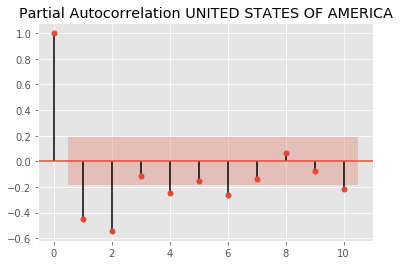

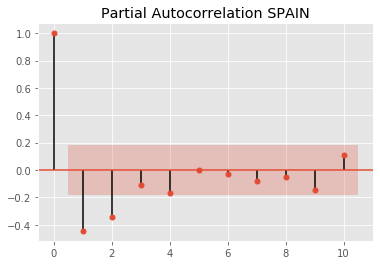

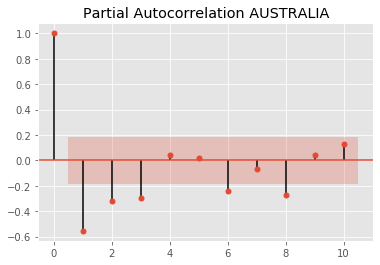

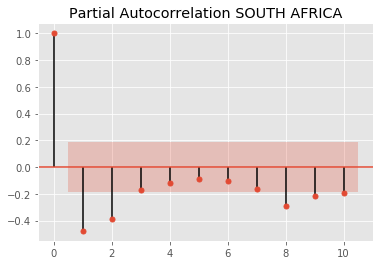

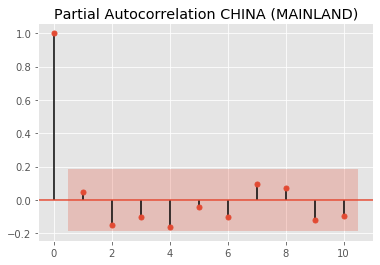

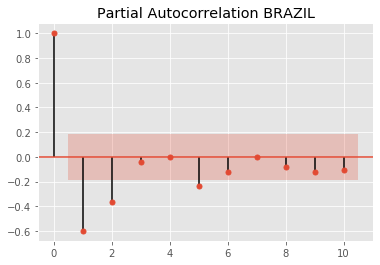

In [49]:
# Plot Partial Autocorrelation Plots for each country on 2nd order difference time series
from statsmodels.graphics.tsaplots import plot_pacf

for key in diff2_country_df_dict.keys():
    plot_pacf(diff2_country_df_dict[key], lags = 10)
    plt.title(f'Partial Autocorrelation {key[:-3]}')

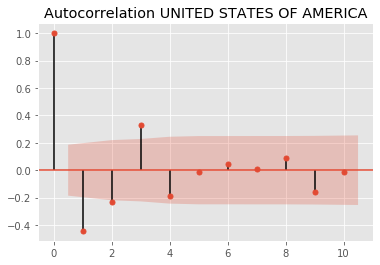

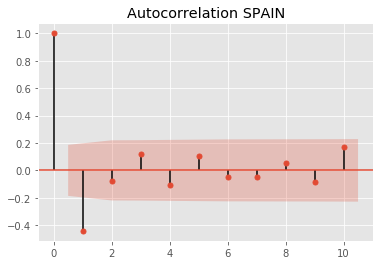

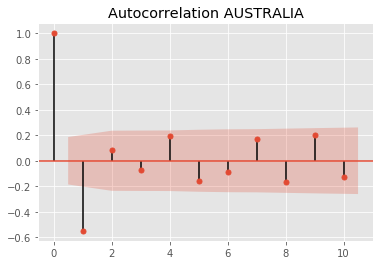

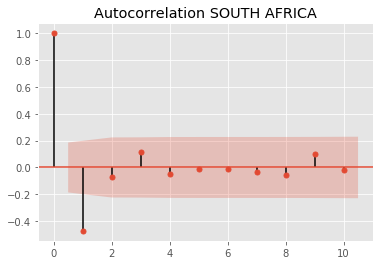

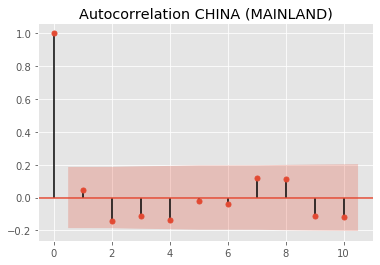

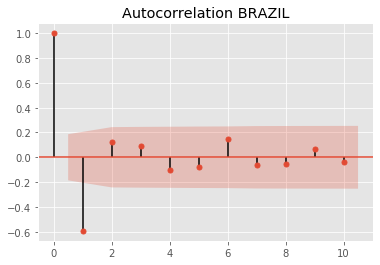

In [51]:
# Plot Autocorrelation Plots for each country on 2nd order difference time series
from statsmodels.graphics.tsaplots import plot_acf

for key in diff2_country_df_dict.keys():
    plot_acf(diff2_country_df_dict[key], lags = 10)
    plt.title(f'Autocorrelation {key[:-3]}')